In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/increasing-breast-cancer-awareness/breast_cancer_survival.csv


In [3]:
import csv
import matplotlib.pyplot as plt 
import seaborn as sns 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [175]:
# Открываю датафрейм
df = pd.read_csv("/kaggle/input/increasing-breast-cancer-awareness/breast_cancer_survival.csv") 
# Знакомлюсь с данными 
df.info(memory_usage='deep')
# Убираю то, что не понадобится
df = df.dropna()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 230.2 K

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


Age - возраст 

Gender - пол 

Protein1, Protein2, Protein3, Protein4 - экспрессия белков

Tumor_Stage - стадия рака молочной железы

Histology  - тип рака 

ER status  

PR status

HER2 status

Surgery_type - тип операции 

Date of Surgery - дата операции

Date of Last Visit - дата последнего визита

Patient Status (Alive/Dead) - статут пациента (жив или мертв) 

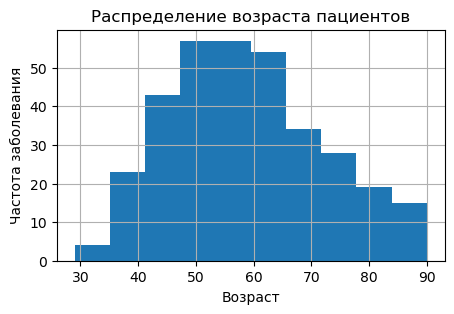

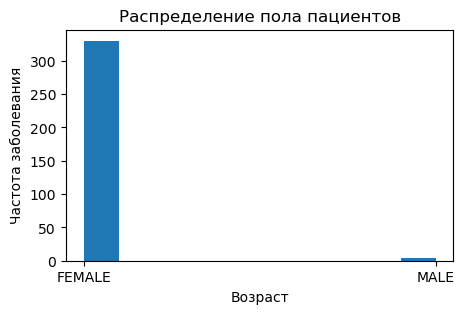

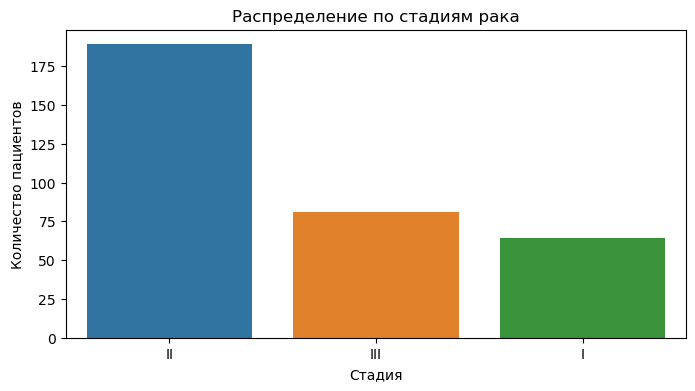

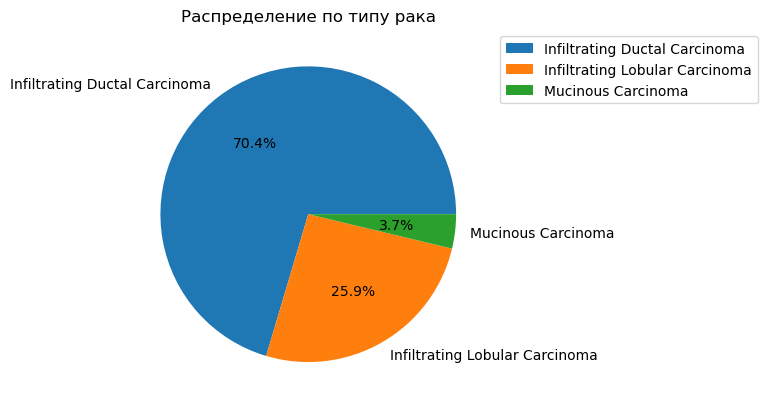

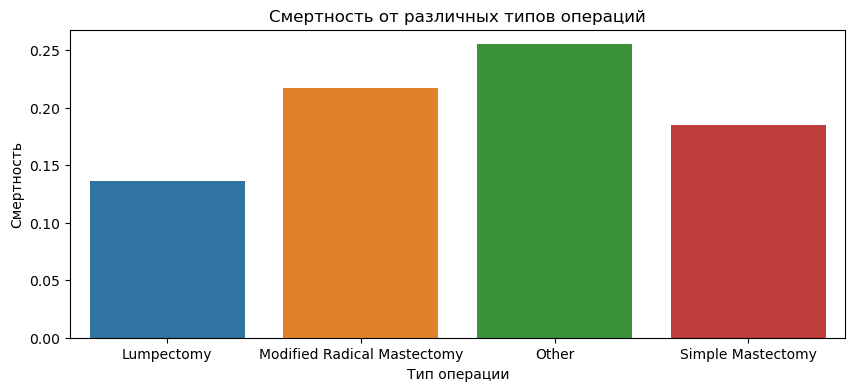

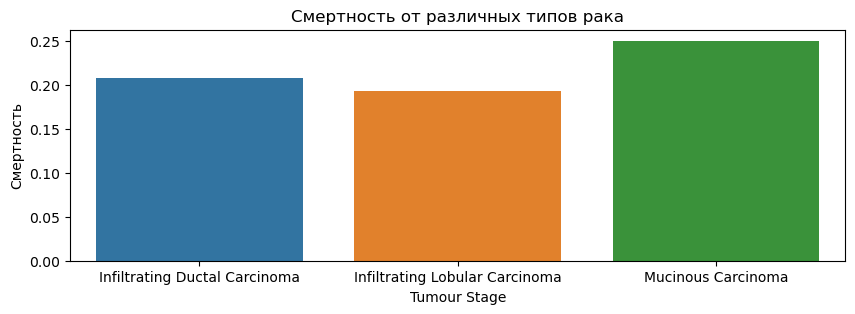

In [166]:
# Распределение по возрасту
plt.figure(figsize=(5,3))
plt.hist(df['Age'])
plt.grid()
plt.title('Распределение возраста пациентов')
plt.xlabel('Возраст')
plt.ylabel('Частота заболевания')
plt.show()

# Распределение по возрасту
plt.figure(figsize=(5,3))
plt.hist(df['Gender'])
plt.title('Распределение пола пациентов')
plt.xlabel('Возраст')
plt.ylabel('Частота заболевания')
plt.show()

# Распреление по стадиям рака
plt.figure(figsize=(8,4))
sns.countplot(x='Tumour_Stage', data=df, order=df['Tumour_Stage'].value_counts().index)
plt.title('Распределение по стадиям рака')
plt.xlabel('Стадия')
plt.ylabel('Количество пациентов')
plt.show()

surv_by_histology = df.groupby(['Histology', 'Patient_Status']).size().unstack().reset_index()
surv_by_histology['Процент смертности'] = survival_by_stage['Dead'] / (survival_by_stage['Alive'] + survival_by_stage['Dead'])

# Распределение по типу рака в процентах
surv_by_histology['All'] = surv_by_histology['Alive'] + surv_by_histology['Dead']
plt.pie(surv_by_histology['All'],labels = surv_by_histology['Histology'],autopct='%1.1f%%')
plt.title('Распределение по типу рака')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

# Смертность от проводимой операции
plt.figure(figsize=(10,4))
sns.barplot(x='Surgery_type', y='Процент смертности', data=surv_by_surgery)
plt.title('Смертность от различных типов операций')
plt.xlabel('Тип операции')
plt.ylabel('Смертность')
plt.show()

# Смертность по проводимой операции от рака
surv_by_surgery = df.groupby(['Surgery_type', 'Patient_Status']).size().unstack().reset_index()
surv_by_surgery['Процент смертности'] = surv_by_surgery['Dead'] / (surv_by_surgery['Alive'] + surv_by_surgery['Dead'])

plt.figure(figsize=(10,3))
sns.barplot(x='Histology', y='Процент смертности', data=surv_by_histology)
plt.title('Смертность от различных типов рака')
plt.xlabel('Tumour Stage')
plt.ylabel('Смертность')
plt.show()

In [182]:
# Посмотрим сколько занимало лечение 
df['Date_of_Surgery']= pd.to_datetime(df['Date_of_Surgery'],format = '%d-%b-%y')
df['Date_of_Last_Visit']= pd.to_datetime(df['Date_of_Last_Visit'],format = '%d-%b-%y')
df['Лечение'] = df['Date_of_Last_Visit'] - df['Date_of_Surgery']
df['Лечение'] = df['Лечение'].dt.days.astype(int)
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4,Лечение
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713,447.776025
std,12.827374,0.543858,0.906153,0.589027,0.625965,386.279467
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500,0.000000
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240,189.000000
50%,58.000000,0.005649,0.997130,-0.193040,0.038522,372.000000
75%,67.000000,0.336260,1.612000,0.251210,0.436250,595.000000
max,90.000000,1.593600,3.402200,2.193400,1.629900,3019.000000


**Подозрительно, что лечение длилось 0 дней.**

In [185]:
df[df['Лечение'] == 0]

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Лечение
312,58,FEMALE,-0.54747,0.3066,-0.59195,-0.37415,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-02-09,2018-02-09,Dead,0


**Весьма вероятно, что пациент умер во время операции.**

<Axes: xlabel='Protein4', ylabel='Count'>

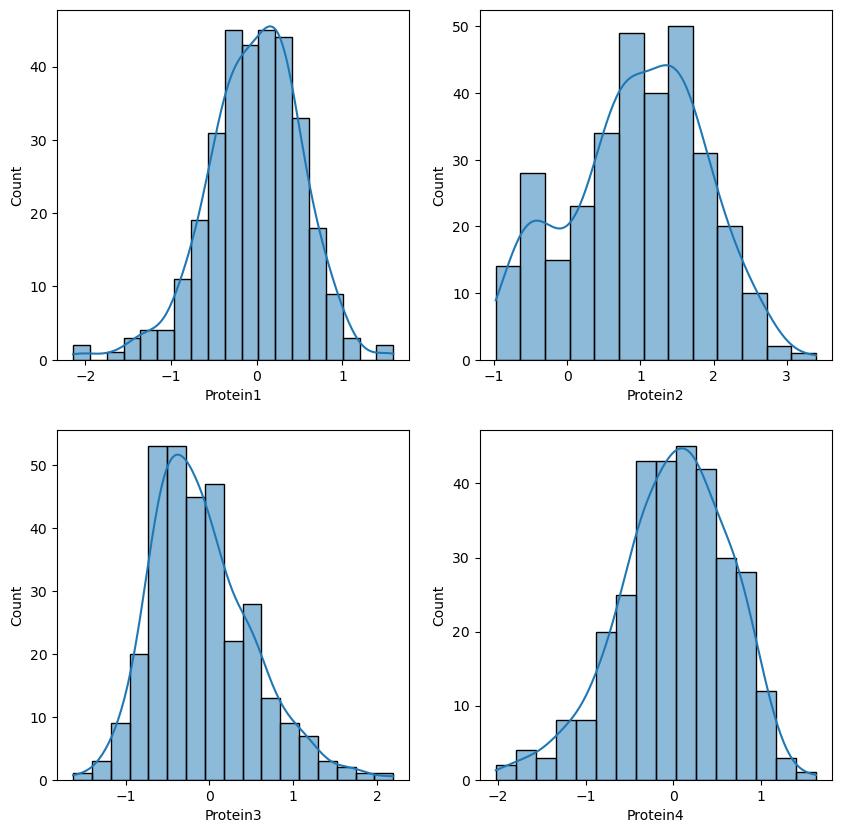

In [250]:
fig,axs = plt.subplots(2,2, figsize = (10,10))

sns.histplot(data = df['Protein1'],kde = True,ax = axs[0,0])
sns.histplot(data = df['Protein2'],kde = True,ax = axs[0,1])
sns.histplot(data = df['Protein3'],kde = True,ax = axs[1,0])
sns.histplot(data = df['Protein4'],kde = True,ax = axs[1,1])